In [1]:
# set root directory path
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get("PROJECT_SRC")
os.chdir(src_path)

src_path

'C:/Users/ramiz/OneDrive - University of Edinburgh/University Courses/5. Fifth Year/Semester 2/Power Systems 5/Assignments/Power_Systems_5_Assignments'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Q 2.1

## Power

In [3]:
df_power = pd.read_csv("Assignment_3/q2_powers.csv")

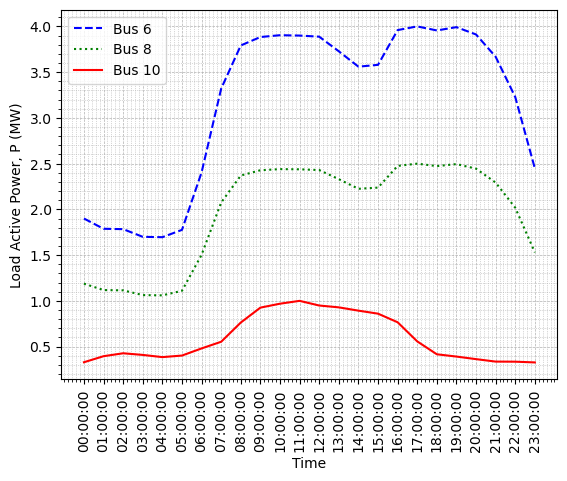

In [4]:
plt.plot(df_power["Time"], df_power["bus 6 P"], color="blue", label="Bus 6", linestyle="--")
plt.plot(df_power["Time"], df_power["bus 8 P"], color="green", label="Bus 8", linestyle=":")
plt.plot(df_power["Time"], df_power["bus 10 P"], color="red", label="Bus 10", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Load Active Power, P (MW)")
plt.xticks(rotation=90)
plt.minorticks_on()
plt.legend()
plt.grid(which="major", linewidth=0.5, linestyle="--")
plt.grid(which="minor", linewidth=0.5, linestyle=":")
plt.show()

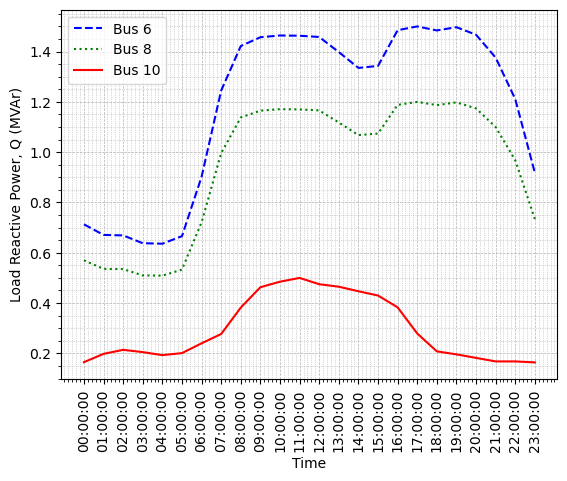

In [5]:
plt.plot(df_power["Time"], df_power["bus 6 Q"], color="blue", label="Bus 6", linestyle="--")
plt.plot(df_power["Time"], df_power["bus 8 Q"], color="green", label="Bus 8", linestyle=":")
plt.plot(df_power["Time"], df_power["bus 10 Q"], color="red", label="Bus 10", linestyle="-")
plt.xlabel("Time")
plt.ylabel("Load Reactive Power, Q (MVAr)")
plt.xticks(rotation=90)
plt.minorticks_on()
plt.legend()
plt.grid(which="major", linewidth=0.5, linestyle="--")
plt.grid(which="minor", linewidth=0.5, linestyle=":")
plt.show()

# Q 2.2

In [6]:
df_loading = pd.read_csv("Assignment_3/q2_2_line_loading.csv")

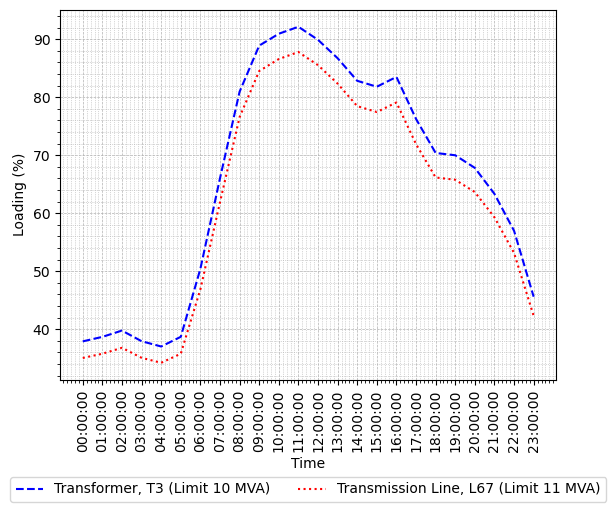

In [7]:
plt.plot(df_loading["Time"], df_loading["T3_loading"], color="blue", label="Transformer, T3 (Limit 10 MVA)",
         linestyle="--")
plt.plot(df_loading["Time"], df_loading["L67_loading"], color="red", label="Transmission Line, L67 (Limit 11 MVA)",
         linestyle=":")
plt.xlabel("Time")
plt.ylabel("Loading (%)")
plt.xticks(rotation=90)
plt.minorticks_on()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.grid(which="major", linewidth=0.5, linestyle="--")
plt.grid(which="minor", linewidth=0.5, linestyle=":")
plt.show()

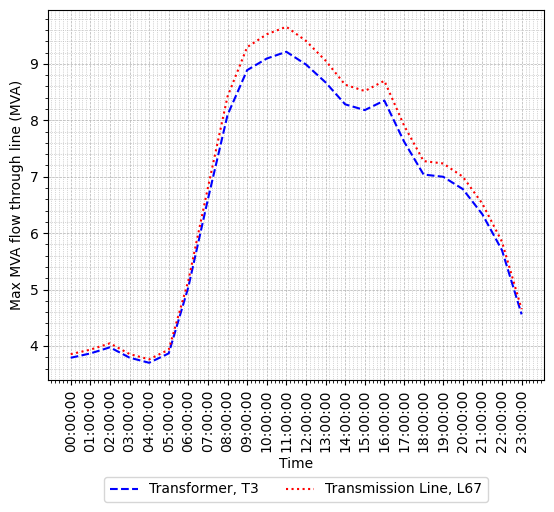

In [8]:
plt.plot(df_loading["Time"], df_loading["MVA_flow_T3"], color="blue", label="Transformer, T3", linestyle="--")
plt.plot(df_loading["Time"], df_loading["MVA_flow_L67"], color="red", label="Transmission Line, L67", linestyle=":")
plt.xlabel("Time")
plt.ylabel("Max MVA flow through line (MVA)")
plt.xticks(rotation=90)
plt.minorticks_on()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), ncol=2)
plt.grid(which="major", linewidth=0.5, linestyle="--")
plt.grid(which="minor", linewidth=0.5, linestyle=":")
plt.show()

In [9]:
df_bus_ave = pd.read_csv("Assignment_3/2_1_bus_volt.csv")
df_bus_max = pd.read_csv("Assignment_3/2_2_bus_volt.csv")

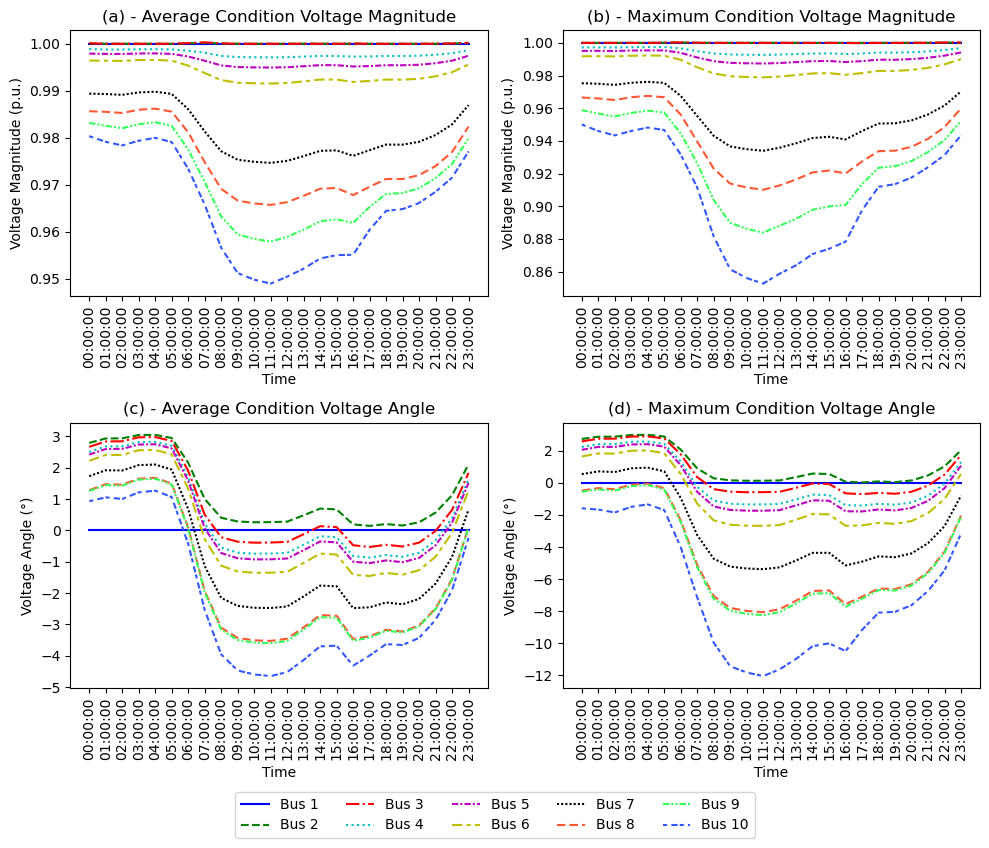

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()
subplot_labels = ['(a)', '(b)', '(c)', '(d)']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#ff5733', '#33ff57', '#3357ff']
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 2, 2, 2)), (0, (1, 1)), (0, (4, 2)),
              (0, (3, 1, 1, 1, 1, 1)), (0, (2, 2, 3, 1))]

lines = []  # To store the plot line objects for the legend

# Plot data in each subplot
x = df_bus_ave["Time"]

for i in range(10):
    line1, = axes[0].plot(x, df_bus_ave[f"Bus{i + 1} PU"], label=f"Bus {i + 1}", color=colors[i],
                          linestyle=linestyles[i])
    lines.append(line1)

    line2, = axes[1].plot(x, df_bus_max[f"Bus{i + 1} PU"], label=f"Bus {i + 1}", color=colors[i],
                          linestyle=linestyles[i])
    lines.append(line2)

    line3, = axes[2].plot(x, df_bus_ave[f"Bus{i + 1} Angle"], label=f"Bus {i + 1}", color=colors[i],
                          linestyle=linestyles[i])
    lines.append(line3)

    line4, = axes[3].plot(x, df_bus_max[f"Bus{i + 1} Angle"], label=f"Bus {i + 1}", color=colors[i],
                          linestyle=linestyles[i])
    lines.append(line4)

axes[0].set_ylabel('Voltage Magnitude (p.u.)')
axes[1].set_ylabel('Voltage Magnitude (p.u.)')
axes[2].set_ylabel(f'{"Voltage Angle ("}{u"\N{DEGREE SIGN}"}{")"}')
axes[3].set_ylabel(f'{"Voltage Angle ("}{u"\N{DEGREE SIGN}"}{")"}')
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time')
axes[2].set_xlabel('Time')
axes[3].set_xlabel('Time')
axes[0].set_title(subplot_labels[0] + ' - Average Condition Voltage Magnitude')
axes[1].set_title(subplot_labels[1] + ' - Maximum Condition Voltage Magnitude')
axes[2].set_title(subplot_labels[2] + ' - Average Condition Voltage Angle')
axes[3].set_title(subplot_labels[3] + ' - Maximum Condition Voltage Angle')

axes[0].tick_params(axis='x', rotation=90, which='major')
axes[1].tick_params(axis='x', rotation=90, which='major')
axes[2].tick_params(axis='x', rotation=90, which='major')
axes[3].tick_params(axis='x', rotation=90, which='major')

legend_labels = [f"Bus {i + 1}" for i in range(10)]
legend_handles = []
for i in range(10):
    line, = axes[0].plot([], [], color=colors[i], linestyle=linestyles[i], label=f"Bus {i + 1}")
    legend_handles.append(line)
    line.remove()  # Remove the temporary lines from the plot
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center', bbox_to_anchor=(0.5, 0.05),
           ncol=5)  # Adjusted ncol

plt.subplots_adjust(bottom=0.15)  # Adjust the bottom margin
plt.tight_layout(rect=[0, 0.1, 1, 0.90])  # Adjust the bottom value (0.10)

plt.show()